Vincent Broda
CS522 HW3
this is question 3 of the hw, each question ended up being done on a diffrent platform, sorry about that.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
def load_data(f):
    # process training data
    data = np.genfromtxt(f, dtype=str, skip_header=1)
    # return all feature columns except last
    X = data[:, :-1]
    X = X.astype(float)
    y = (data[:, -1] == 'Yes').astype(int)

    return X, y

In [ ]:
def custom_pca(X, num_components):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std

    cov_matrix = np.cov(X_standardized, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]
    top_eigenvectors = eigenvectors[:, :num_components]

    reduced = np.dot(X_standardized, top_eigenvectors)

    return reduced

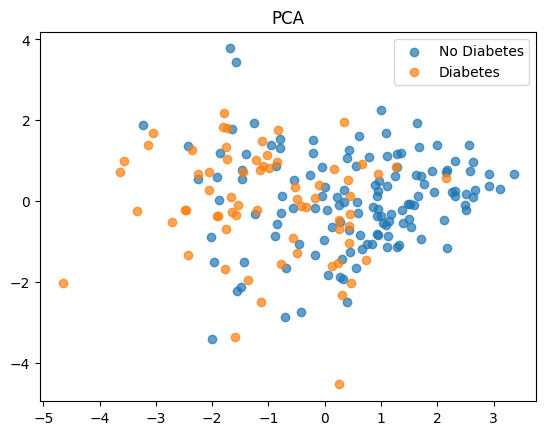

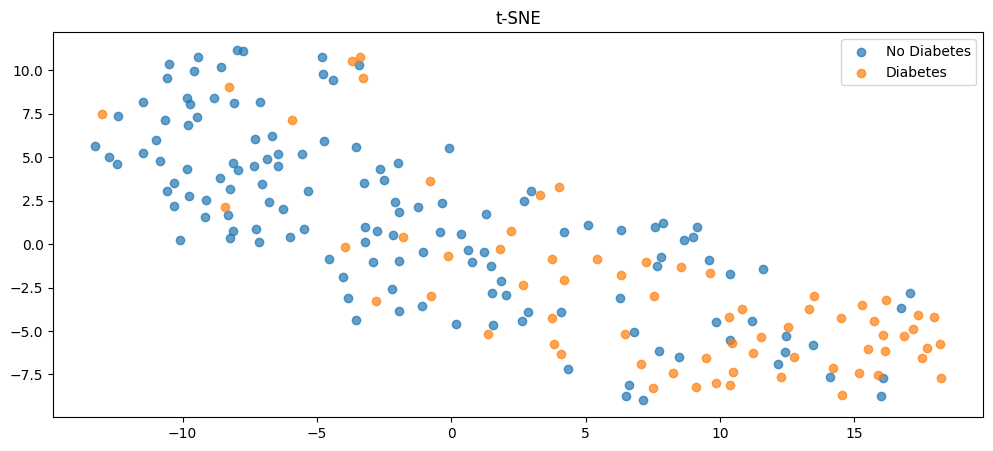

In [ ]:
X, y = load_data('/content/pima.tr.txt')

p = custom_pca(X, 2)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.figure(0)
plt.scatter(p[y == 0, 0], p[y == 0, 1], label='No Diabetes', alpha=0.7) # alpha for read-ability of graph
plt.scatter(p[y == 1, 0], p[y == 1, 1], label='Diabetes', alpha=0.7)
plt.title('PCA')
plt.legend()

plt.figure(1)
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label='No Diabetes', alpha=0.7)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label='Diabetes', alpha=0.7)
plt.title('t-SNE')
plt.legend()

plt.show()

Comments on two methods



With PCA, our objective is to represent the data in a more compact, we do not care about the classification data or discriminating the data. We are really trying to maximize the variance of our givesn data, without alltering it's real value.
In PCA, we first want to standardize the data set, which is done by subtracting by the average of each feture. If we where to visualize this, it would be like shifting the plot to the middle. We can then get the covariance matrix, then the eignenvalues from this matrix. We sort these values, these values help tell use how valuable each feture is. We then project our data onto the pc's, eignanvectors.
I belive this is basically the point of/ what happens when going though all of the graph and projections like we did in class.
This function is farily efficent, and should work well on even larger datasets, I would get scared using the more fetures their are though.
Its probably good to use whenever a quick and reliable reduction is needed.

With t-SNE, the objective is to preserwve a lot of the information of the data set while lowering the deminsionality. The main point is to try to keep the clusters of the classifiers stay together when scalled down. That is a super simplified way of saying it though.
Based on trying to look up more about the procedure, I belive it works by using similarity mesurements of points. Samples that have high similarities will attrackt and those that have low ones will repel. This has to be done one at a time, which is a big reason why this is slower. In the end, after enough itterations and repells and attractions the points should gather together.
This function takes a lot more time to compute, but the trade of is getting a better reduction that can give more information.
I imagine this being used for stuff like character recognition, like in the oreilly demo where they simplified all of the digits. It is worth noting the Oreilly article does mention that more efficient versions of t-SNE can be done to make it better for larger datasets, which would make it even more useful/


For PCA, the objective function is something like J(w) = (||mu1 -mu2||^2) \ (sigma^2 * e * sigma^2). I got this from my notes and I think this is what we went though in class.